In [20]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Extend sys.path for relative imports
sys.path.extend(["/Users/daddy30000/dev/ucb_smartcities_all/sandbox/neverforgit/src/main/python/CanonicalSmartBay/"])
import utils.counts

%matplotlib inline

# Constants

In [21]:
utils

<module 'utils' from '/Users/daddy30000/dev/ucb_smartcities_all/sandbox/neverforgit/src/main/python/CanonicalSmartBay/utils/__init__.pyc'>

In [22]:
root_out_dir = "/Users/daddy30000/14_Mobility_Sim/GoogleDrive/ATT_experiments_output/1M"

In [23]:
prefixes = list(set([n.split('.')[0]+".25." for n in os.listdir(root_out_dir)]))
prefixes.sort()
storage_factors = []
flow_factors = []
for p in prefixes:
    facs = re.findall("[0-9]{2}", p)[0:2]
    storage_factors.append(int(facs[1]))
    flow_factors.append(int(facs[0]))

# Count RMSE Matrices  

### Iterate through every countscompared_rescaled.txt file. Store the RMSE in a way that is easy to grid for plotting the heatmap.

In [24]:
# Helper function that returns the counts RMSE for the given file name
def calc_count_RMSE(fname):
    df = pd.read_csv(fname, sep='\t')
    _, RMSE, _ = utils.counts.optimize_counts(df)
    return RMSE

In [25]:
# Create a DataFrame where columns are: storageCapacityFactor, flowCapacityFactor, and RMSE
# Use seaborn to make the heatmap
os.chdir(root_out_dir)
flow_factors = np.empty(len(prefixes))
storage_factors = np.empty(len(prefixes))
count_RMSE = np.empty(len(prefixes))
for i,pfx in enumerate(prefixes):
    facs = re.findall("[0-9]{2}", pfx)[0:2]
    flow_factors[i] = int(facs[0])/100.0  # flowCapictyFactor
    storage_factors[i] = int(facs[1])/100.0
    fname = pfx + 'countscompare_rescaled.txt'
    count_RMSE[i] = calc_count_RMSE(fname)
counts_df = pd.DataFrame({'flowCapacityFactor': flow_factors, 'storageCapacityFactor':storage_factors, 
                  'count_RMSE': count_RMSE})

## Visualize heatmap of count RMSE values

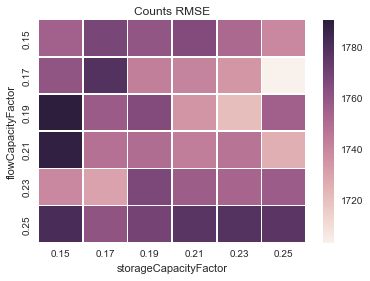

In [26]:
ax = sns.heatmap(counts_df.pivot(index="flowCapacityFactor", columns="storageCapacityFactor", values="count_RMSE"))
ax.set_title("Counts RMSE")

In [27]:
print "Min count RMSE: " + str(counts_df.count_RMSE.min())
print counts_df.iloc[counts_df.count_RMSE.idxmin(),:]

Min count RMSE: 1703.37773367
count_RMSE               1703.377734
flowCapacityFactor          0.170000
storageCapacityFactor       0.250000
Name: 11, dtype: float64


In [28]:
counts_df.count_RMSE

0     1755.442623
1     1768.245236
2     1760.571783
3     1765.451854
4     1751.687337
5     1739.957783
6     1760.932011
7     1779.203382
8     1743.055486
9     1741.095688
10    1734.669049
11    1703.377734
12    1790.954856
13    1758.111446
14    1765.924851
15    1735.111845
16    1721.117030
17    1755.930873
18    1789.447766
19    1748.686091
20    1750.501196
21    1743.704214
22    1747.504834
23    1726.126879
24    1739.921608
25    1730.336965
26    1767.559189
27    1757.089769
28    1753.595639
29    1757.450639
30    1782.066163
31    1761.238570
32    1769.388432
33    1777.602088
34    1778.711127
35    1777.224111
Name: count_RMSE, dtype: float64

In [29]:
print "Best time configuration: (0.23, 0.25)" 
rmse_best_time = counts_df[(counts_df.flowCapacityFactor==0.23) & (counts_df.storageCapacityFactor==0.25)].count_RMSE
rmse_min = counts_df.iloc[counts_df.count_RMSE.idxmin(),:].count_RMSE

print "RMSE % difference: " + str(np.true_divide((rmse_best_time - rmse_min), rmse_min))

Best time configuration: (0.23, 0.25)
RMSE % difference: 29    0.031745
Name: count_RMSE, dtype: float64


In [30]:
print "Compromise time configuration: (0.21, 0.25)" 
rmse_best_time = counts_df[(counts_df.flowCapacityFactor==0.21) & (counts_df.storageCapacityFactor==0.25)].count_RMSE
rmse_min = counts_df.iloc[counts_df.count_RMSE.idxmin(),:].count_RMSE

print "RMSE % difference: " + str(np.true_divide((rmse_best_time - rmse_min), rmse_min))

Compromise time configuration: (0.21, 0.25)
RMSE % difference: 23    0.013355
Name: count_RMSE, dtype: float64


In [31]:
print "Worst time configuration: " + str(counts_df.count_RMSE.max())
counts_df.iloc[counts_df.count_RMSE.idxmax(),:]

Worst time configuration: 1790.95485604


count_RMSE               1790.954856
flowCapacityFactor          0.190000
storageCapacityFactor       0.150000
Name: 12, dtype: float64

# Travel time validation

## Totals analysis

In [33]:
# Create a DataFrame where columns are: storageCapacityFactor, flowCapacityFactor, and average H2W commute time
# Use seaborn to make the heatmap
os.chdir(root_out_dir)
flow_factors = np.empty(len(prefixes))
storage_factors = np.empty(len(prefixes))
comm_time = np.empty(len(prefixes))
for i,pfx in enumerate(prefixes):
    facs = re.findall("[0-9]{2}", pfx)[0:2]
    flow_factors[i] = int(facs[0])/100.0  # flowCapictyFactor
    storage_factors[i] = int(facs[1])/100.0
    fname = pfx + 'ValidationCommuteAnalyzerTotals.txt'
    temp = pd.read_csv(fname, sep='\t')
    comm_time[i] = np.true_divide(temp.TotalTimeH2W.mean(), 60.0)
    
total_time = pd.DataFrame({'flowCapacityFactor': flow_factors, 'storageCapacityFactor':storage_factors, 
                  'H2W_Total_Time': comm_time})

### Total H2W commute time

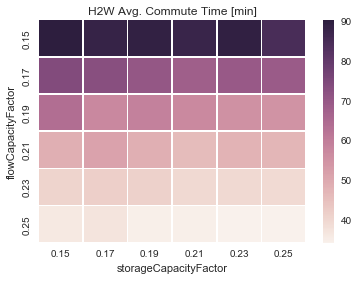

In [34]:
ax = sns.heatmap(total_time.pivot(index="flowCapacityFactor", columns="storageCapacityFactor", values="H2W_Total_Time"))
ax.set_title("H2W Avg. Commute Time [min]")

In [36]:
total_time[total_time.flowCapacityFactor==0.21]

H2W_Total_Time  flowCapacityFactor  storageCapacityFactor
18       49.136335                0.21                   0.15
19       51.724817                0.21                   0.17
20       49.165807                0.21                   0.19
21       46.277631                0.21                   0.21
22       48.145377                0.21                   0.23
23       47.424070                0.21                   0.25

In [37]:
total_time[total_time.flowCapacityFactor==0.23]

H2W_Total_Time  flowCapacityFactor  storageCapacityFactor
24       41.312490                0.23                   0.15
25       42.016096                0.23                   0.17
26       41.671213                0.23                   0.19
27       40.052322                0.23                   0.21
28       39.996273                0.23                   0.23
29       39.698523                0.23                   0.25

In [38]:
total_time[total_time.flowCapacityFactor==0.25]

H2W_Total_Time  flowCapacityFactor  storageCapacityFactor
30       36.482680                0.25                   0.15
31       37.507855                0.25                   0.17
32       35.200287                0.25                   0.19
33       35.083582                0.25                   0.21
34       34.685378                0.25                   0.23
35       34.583329                0.25                   0.25

## Freeway analysis

In [39]:
# Create a DataFrame where columns are: storageCapacityFactor, flowCapacityFactor, and average H2W commute time
# Use seaborn to make the heatmap
os.chdir(root_out_dir)
flow_factors = np.empty(len(prefixes))
storage_factors = np.empty(len(prefixes))
delay_time = np.empty(len(prefixes))
congestion_time = np.empty(len(prefixes))
for i,pfx in enumerate(prefixes):
    facs = re.findall("[0-9]{2}", pfx)[0:2]
    flow_factors[i] = int(facs[0])/100.0  # flowCapictyFactor
    storage_factors[i] = int(facs[1])/100.0
    fname = pfx + 'ValidationCommuteAnalyzerFwy.txt'
    temp = pd.read_csv(fname, sep='\t')
    delay_time[i] = np.true_divide(temp.DelayTimeH2W.mean(), 60.0)
    congestion_time[i] = np.true_divide(temp.TimeInCongestionH2W.mean(), 60.0)
    
fwy = pd.DataFrame({'flowCapacityFactor': flow_factors, 'storageCapacityFactor':storage_factors, 
                  'Delay_Time': delay_time, 'Congestion_Time': congestion_time})

### Freeway delay time

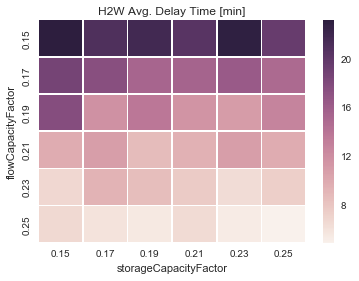

In [40]:
ax = sns.heatmap(fwy.pivot(index="flowCapacityFactor", columns="storageCapacityFactor", values="Delay_Time"))
ax.set_title("H2W Avg. Delay Time [min]")

### Freeway time in congestion

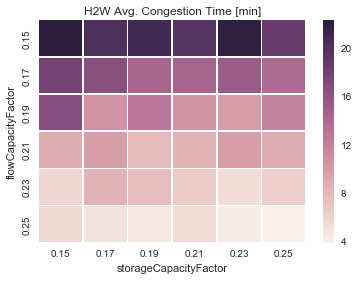

In [41]:
ax = sns.heatmap(fwy.pivot(index="flowCapacityFactor", columns="storageCapacityFactor", values="Congestion_Time"))
ax.set_title("H2W Avg. Congestion Time [min]")

# Rough Travel Time Estimates

Goal is to write a method to roughly estimate travel time based on departure time and euclidian distance.

In [42]:
df_path = "/Users/daddy30000/14_Mobility_Sim/GoogleDrive/ATT_experiments_output/1M/0p23_0p25.25.ValidationCommuteAnalyzerTotals.txt"

In [78]:
df = pd.read_csv(df_path, sep='\t')

In [75]:
def vector_euclidian_dist(df):
    dxs = df.WorkX.subtract(df.HomeX)
    dys = df.WorkY.subtract(df.HomeY)
    x = np.stack((dxs, dys), axis=1)
    return np.linalg.norm(x, axis=1)
    

In [80]:
df.head()

AgentId          HomeX         HomeY  HomeDepTime  TotalTimeH2W  \
0  7078804  548109.951339  4.181725e+06      36001.0         126.0   
1   285559  566184.450770  4.191908e+06      22413.0         995.0   
2  5833650  587709.248756  4.129694e+06      17413.0         458.0   
3  3159779  592649.803658  4.126027e+06      24087.0         428.0   
4  2351615  588577.169131  4.244852e+06      30894.0         558.0   

   DelayTimeH2W  TimeInCongestionH2W  TotalDistH2W  DelayDistH2W  \
0          25.0            22.058648   1916.061334   1757.499823   
1         228.0           228.062582   9978.591246   9928.640801   
2          69.0            20.234026   9317.651741   8904.600777   
3          93.0            37.863659   8946.855494   8807.349662   
4         175.0           160.782561   6291.237552   6040.571793   

   DistInCongestionH2W     ...              WorkY  WorkDepTime  TotalTimeW2H  \
0          1007.555743     ...       4.181103e+06      67252.0          69.0   
1          9896.246477     ...       4.194749e+06      54685.0        1106.0   
2          1708.737008     ...       4.128884e+06      21522.0         539.0   
3           661.168471     ...       4.132340e+06      56513.0         458.0   
4          4251.081869     ...       4.249180e+06      62700.0         840.0   

   DelayTimeW2H  TimeInCongestionW2H  TotalDistW2H  DelayDistW2H  \
0          18.0            16.791462    991.512449    832.950937   
1         379.0           318.484946  14836.343189  14797.169597   
2          66.0            45.978198   8909.883944   8496.832980   
3         116.0            65.444277   8883.781360   8744.275528   
4         428.0           415.572568   6750.111438   6499.445679   

   DistInCongestionW2H  Unnamed: 19     Euc_Dist  
0           526.120271          NaN   631.122794  
1          6272.164470          NaN  3755.045688  
2          3482.395115          NaN  6226.571650  
3          1145.567364          NaN  6468.959689  
4          4235.118131          NaN  4385.376325  

[5 rows x 21 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13be76fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17113d710>]], dtype=object)

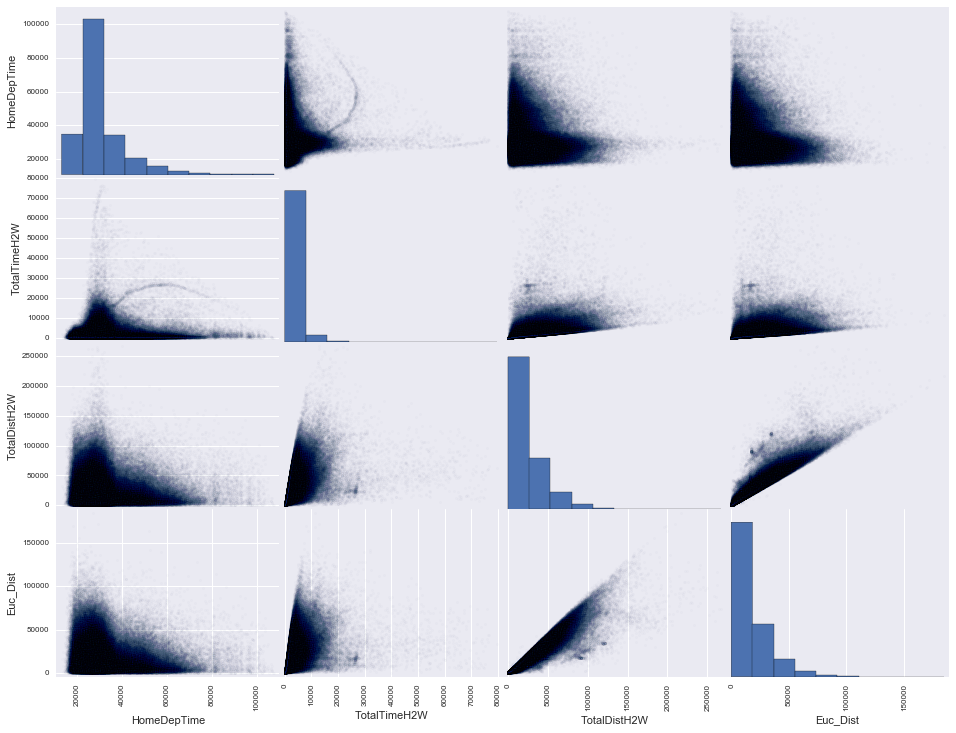

In [88]:
pd.scatter_matrix(df[['HomeDepTime', 'TotalTimeH2W', 'TotalDistH2W', 'Euc_Dist']], figsize=(16,12), alpha=0.02)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17098bcd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17ea9a390>]], dtype=object)

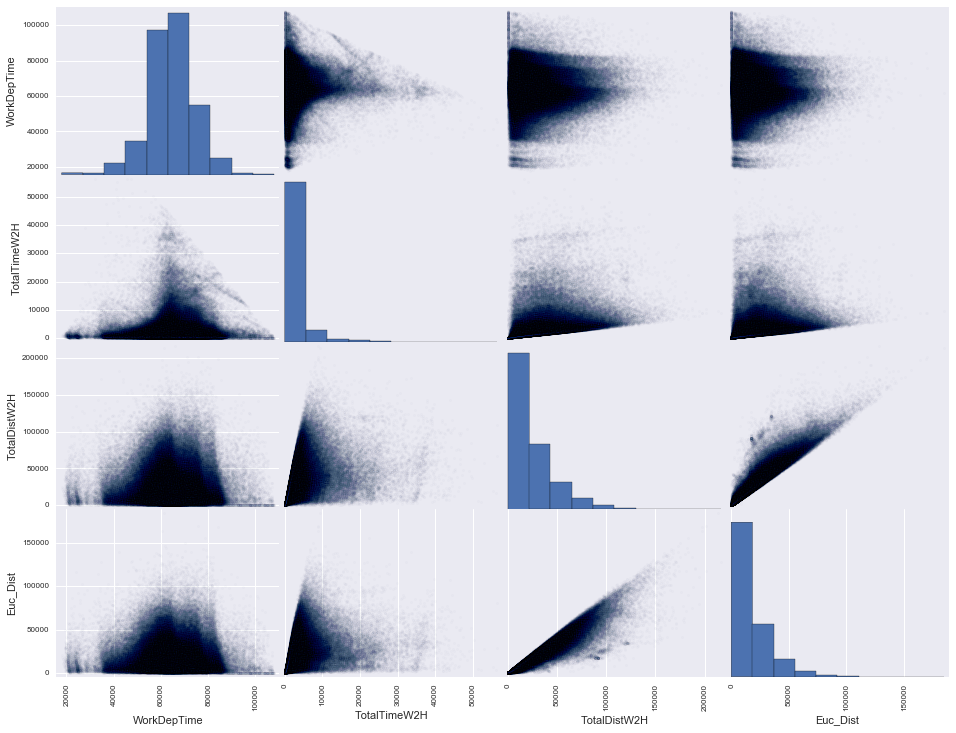

In [89]:
pd.scatter_matrix(df[['WorkDepTime', 'TotalTimeW2H', 'TotalDistW2H', 'Euc_Dist']], figsize=(16,12), alpha=0.02)

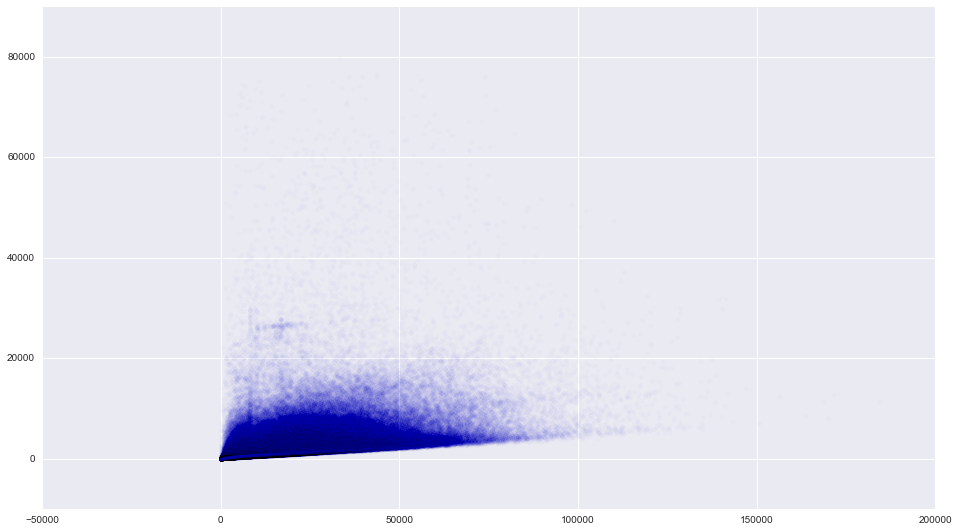

In [91]:
fig = plt.figure(figsize=(16,9))
plt.scatter(df.Euc_Dist, df.TotalTimeH2W, alpha=0.01)

## Simple linear regression to estimate travel time as a function of euclidian distance

In [92]:
from scipy.stats import linregress

### H2W

In [109]:
idxH2W = ~df.TotalTimeH2W.isnull()
xH2W = df.Euc_Dist[idxH2W]
yH2W = df.TotalTimeH2W[idxH2W]

In [110]:
linregress(xH2W, yH2W)

LinregressResult(slope=0.11341254515459331, intercept=473.1904684537069, rvalue=0.49587714495527624, pvalue=0.0, stderr=0.00028714107448440365)

### W2H

In [120]:
idxW2H = ~df.TotalTimeW2H.isnull()
xW2H = df.Euc_Dist[idxW2H]
yW2H = df.TotalTimeW2H[idxW2H]

In [124]:
linregress(xW2H, yW2H)

LinregressResult(slope=0.10565197721828959, intercept=669.42103932282339, rvalue=0.43842310480915342, pvalue=0.0, stderr=0.00031322106712646116)

### All

In [129]:
x_all = np.append(xH2W, xW2H)
y_all = np.append(yH2W, yW2H)
linregress(x_all, y_all)

LinregressResult(slope=0.10952991470246415, intercept=571.13864543068576, rvalue=0.46618002848189072, pvalue=0.0, stderr=0.00021252507435567952)

In [138]:
0.1095**-1*3600 / (1609.0)

20.433009526890693

In [134]:
10/1609.0*3600

22.37414543194531